##EDA on Land cover classes 2023 and Active fire points 2024.
*************************************************************
**Date:** 18th Dec 2024

**Written By:** Priyanka N
*************************************************************


**Importing the essential libraries**

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob

**File path containing the CSV files for land cover data from 2012-2023.**

In [ ]:
file_paths = glob.glob("/content/drive/MyDrive/MODIS_Image*.csv")

len(file_paths)


12

In [ ]:
file_paths

['/content/drive/MyDrive/MODIS_Image_2012_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2013_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2014_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2015_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2016_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2017_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2018_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2019_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2020_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2021_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2022_Vector.csv',
 '/content/drive/MyDrive/MODIS_Image_2023_Vector.csv']

**Combining all the 12 CSV files into one CSV file.**

In [ ]:
import os
# List to hold DataFrames
df_list = []

# Iterate through the files and read each CSV, adding a 'year' column
for file in file_paths:
    # Extract year from the file name (assuming the year is part of the file name)
    file_name = os.path.basename(file)  # Get just the file name
    year = int(file_name.split('_')[2].split('.')[0])  # Example: 'data_2020.csv' -> 2020

    # Read the CSV and add the year column
    df = pd.read_csv(file)
    df['year'] = year  # Add a new 'year' column

    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into one
concatenated_df = pd.concat(df_list, ignore_index=True)

In [ ]:
concatenated_df.tail()

system:index  count  label  \
150729  +18000+6722      2      8   
150730  +18001+6734      1     15   
150731  +18001+6741      3     15   
150732  +18003+6707      3     12   
150733  +18005+6710      1      8   

                                                     .geo  year  
150729  {"geodesic":false,"type":"Polygon","coordinate...  2023  
150730  {"geodesic":false,"type":"Polygon","coordinate...  2023  
150731  {"geodesic":false,"type":"Polygon","coordinate...  2023  
150732  {"geodesic":false,"type":"MultiPolygon","coord...  2023  
150733  {"geodesic":false,"type":"Polygon","coordinate...  2023

In [ ]:
concatenated_df.shape

(150734, 5)

**Checking the land cover classes in the dataframe. So we have 16 land cover classes in Uttarakhand.**

In [ ]:
concatenated_df['label'].unique()

array([ 9, 10, 12,  5, 13,  8,  2, 14,  1,  4,  6, 16, 15, 11, 17,  7])

In [ ]:
len(concatenated_df['label'].unique())

16

In [ ]:
concatenated_df['label'].value_counts()

label
9     34499
5     20770
8     17788
1     17500
10    17117
12    14687
2      9080
14     8681
15     4071
4      3378
16     1590
13      866
11      517
17      179
6         7
7         4
Name: count, dtype: int64

**Converting the CSV file into a GeoDataFrame with geometry column.**

In [ ]:
import json
from shapely.geometry import shape

# Function to parse the GeoJSON-like string and extract only the geometry
def parse_geojson(geojson_str):
    # Convert the string to a Python dictionary
    geo_dict = json.loads(geojson_str)
    # Extract the geometry (type and coordinates)
    geometry = {
        'type': geo_dict['type'],
        'coordinates': geo_dict['coordinates']
    }
    return geometry

# Apply the function to parse the 'geo' column
concatenated_df['geometry'] = concatenated_df['.geo'].apply(parse_geojson)

# Convert the parsed 'geometry' column to actual geometries using Shapely
concatenated_df['geometry'] = concatenated_df['geometry'].apply(lambda x: shape(x))  # Convert to Shapely geometry

# Now, create a GeoDataFrame
gdf = gpd.GeoDataFrame(concatenated_df, geometry='geometry')

# Display the GeoDataFrame
gdf


system:index  count  label  \
0       +17273+6769      4      9   
1       +17273+6770      2     10   
2       +17273+6771      4     12   
3       +17273+6772      2      9   
4       +17274+6772      1     10   
...             ...    ...    ...   
150729  +18000+6722      2      8   
150730  +18001+6734      1     15   
150731  +18001+6741      3     15   
150732  +18003+6707      3     12   
150733  +18005+6710      1      8   

                                                     .geo  year  \
0       {"geodesic":false,"type":"MultiPolygon","coord...  2012   
1       {"geodesic":false,"type":"MultiPolygon","coord...  2012   
2       {"geodesic":false,"type":"Polygon","coordinate...  2012   
3       {"geodesic":false,"type":"MultiPolygon","coord...  2012   
4       {"geodesic":false,"type":"Polygon","coordinate...  2012   
...                                                   ...   ...   
150729  {"geodesic":false,"type":"Polygon","coordinate...  2023   
150730  {"geodesic":false,"type":"Polygon","coordinate...  2023   
150731  {"geodesic":false,"type":"Polygon","coordinate...  2023   
150732  {"geodesic":false,"type":"MultiPolygon","coord...  2023   
150733  {"geodesic":false,"type":"Polygon","coordinate...  2023   

                                                 geometry  
0       MULTIPOLYGON (((77.583 30.40348, 77.58749 30.4...  
1       MULTIPOLYGON (((77.583 30.40797, 77.58749 30.4...  
2       POLYGON ((77.57851 30.41696, 77.57851 30.41246...  
3       MULTIPOLYGON (((77.58749 30.41246, 77.59198 30...  
4       POLYGON ((77.58749 30.41696, 77.59198 30.41696...  
...                                                   ...  
150729  POLYGON ((80.84388 30.19238, 80.85287 30.19238...  
150730  POLYGON ((80.85287 30.24628, 80.85736 30.24628...  
150731  POLYGON ((80.84838 30.28221, 80.84838 30.27772...  
150732  MULTIPOLYGON (((80.86185 30.125, 80.86634 30.1...  
150733  POLYGON ((80.87083 30.13848, 80.87533 30.13848...  

[150734 rows x 6 columns]

**Setting the Coordinate Reference system to EPSG:32644>**

Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf = gdf.set_crs(epsg=32644)

**Filtering out invalid geometries in a GeoDataFrame:** It ensures that only geometries that conform to the Simple Features Specification are kept, avoiding errors in subsequent geospatial operations.

In geospatial analysis, invalid geometries can cause problems, such as errors during spatial operations (e.g., buffering, intersection, union). Common invalid geometries include:

1. Self-intersecting polygons (e.g., polygons where the boundary crosses over itself).
2. Empty geometries (e.g., a polygon with zero area).
3. Geometries with duplicate points.
4. Polygons with a hole that does not close properly.

In [ ]:
gdf = gdf[gdf.is_valid]  #Filtering out the invalid geometries from the gdf

In [ ]:
gdf.shape

(150733, 6)

In [ ]:
gdf.crs

<Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
landcover_types = [
    'Evergreen Needleleaf Forests',
    'Evergreen Broadleaf Forests',
    'Deciduous Needleleaf Forests',
    'Deciduous Broadleaf Forests',
    'Mixed Forests',
    'Closed Shrublands',
    'Open Shrublands',
    'Woody Savannas',
    'Savannas',
    'Grasslands',
    'Permanent Wetlands',
    'Croplands',
    'Urban and Built-up Lands',
    'Cropland/Natural Vegetation Mosaics',
    'Permanent Snow and Ice',
    'Barren',
    'Water Bodies'
]


**Assign a land_cover_type column based on the label.**

In [ ]:
gdf['land_cover_type'] = gdf['label'].apply(lambda x: landcover_types[x-1])


In [119]:
gdf.head(2)

system:index  count  label  \
0  +17273+6769      4      9   
1  +17273+6770      2     10   

                                                .geo  year  \
0  {"geodesic":false,"type":"MultiPolygon","coord...  2012   
1  {"geodesic":false,"type":"MultiPolygon","coord...  2012   

                                            geometry land_cover_type      area  
0  MULTIPOLYGON (((77.583 30.403, 77.587 30.403, ...        Savannas  0.000081  
1  MULTIPOLYGON (((77.583 30.408, 77.587 30.408, ...      Grasslands  0.000040

**Calculate Area by Year and Land Cover Type**

In [ ]:
# Add a new column for the area of each geometry (in square units of the coordinate system, e.g., square meters)
gdf['area'] = gdf.geometry.area

# Group by year and land cover type and sum the areas
area_by_year_landcover = gdf.groupby(['year', 'land_cover_type'])['area'].sum().reset_index()


In [ ]:
area_by_year_landcover

year                      land_cover_type      area
0    2012                               Barren  0.628287
1    2012                    Closed Shrublands  0.000081
2    2012  Cropland/Natural Vegetation Mosaics  0.074221
3    2012                            Croplands  0.634743
4    2012          Deciduous Broadleaf Forests  0.020880
..    ...                                  ...       ...
170  2023                   Permanent Wetlands  0.003631
171  2023                             Savannas  0.730248
172  2023             Urban and Built-up Lands  0.030786
173  2023                         Water Bodies  0.006456
174  2023                       Woody Savannas  1.078960

[175 rows x 3 columns]

**Visualizing the Data on a Map:** One for 2012 and another for 2023.

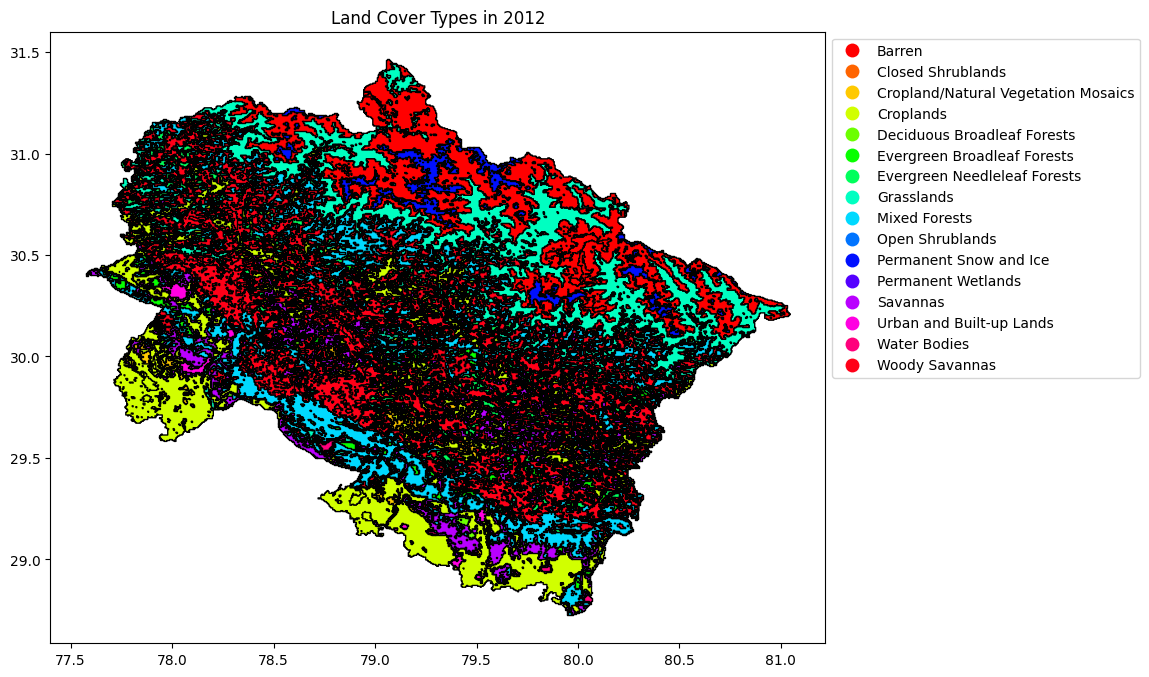

In [ ]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame for a specific year, e.g., 2020
year = 2012
gdf_year = gdf[gdf['year'] == year]

# Plot the land cover types for that year
fig, ax = plt.subplots(figsize=(10, 8))
gdf_year.plot(column='land_cover_type', ax=ax, legend=True,
              legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'},
              cmap='hsv', # You can adjust the color map as needed
              edgecolor='black')

plt.title(f"Land Cover Types in {year}")
plt.show()


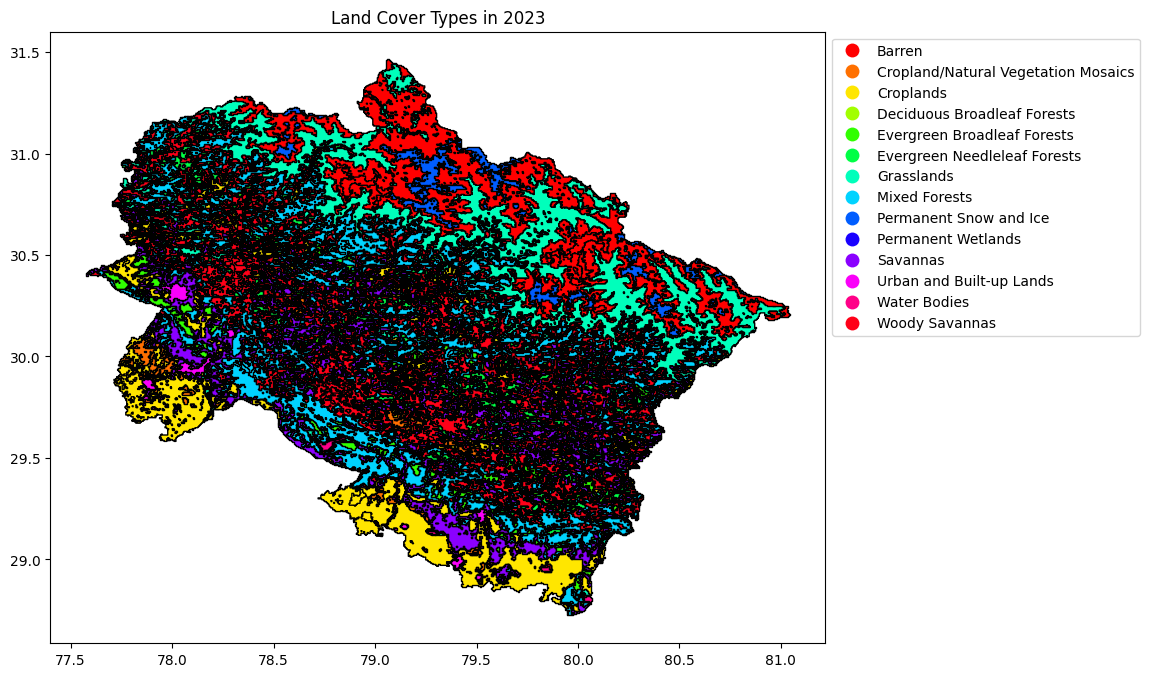

In [ ]:
import matplotlib.pyplot as plt

# Filter the GeoDataFrame for a specific year, e.g., 2020
year = 2023
gdf_year = gdf[gdf['year'] == year]

# Plot the land cover types for that year
fig, ax = plt.subplots(figsize=(10, 8))
gdf_year.plot(column='land_cover_type', ax=ax, legend=True,
              legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'},
              cmap='hsv', # You can adjust the color map as needed
              edgecolor='black')

plt.title(f"Land Cover Types in {year}")
plt.show()


**Plotting the Total Area by Year:**

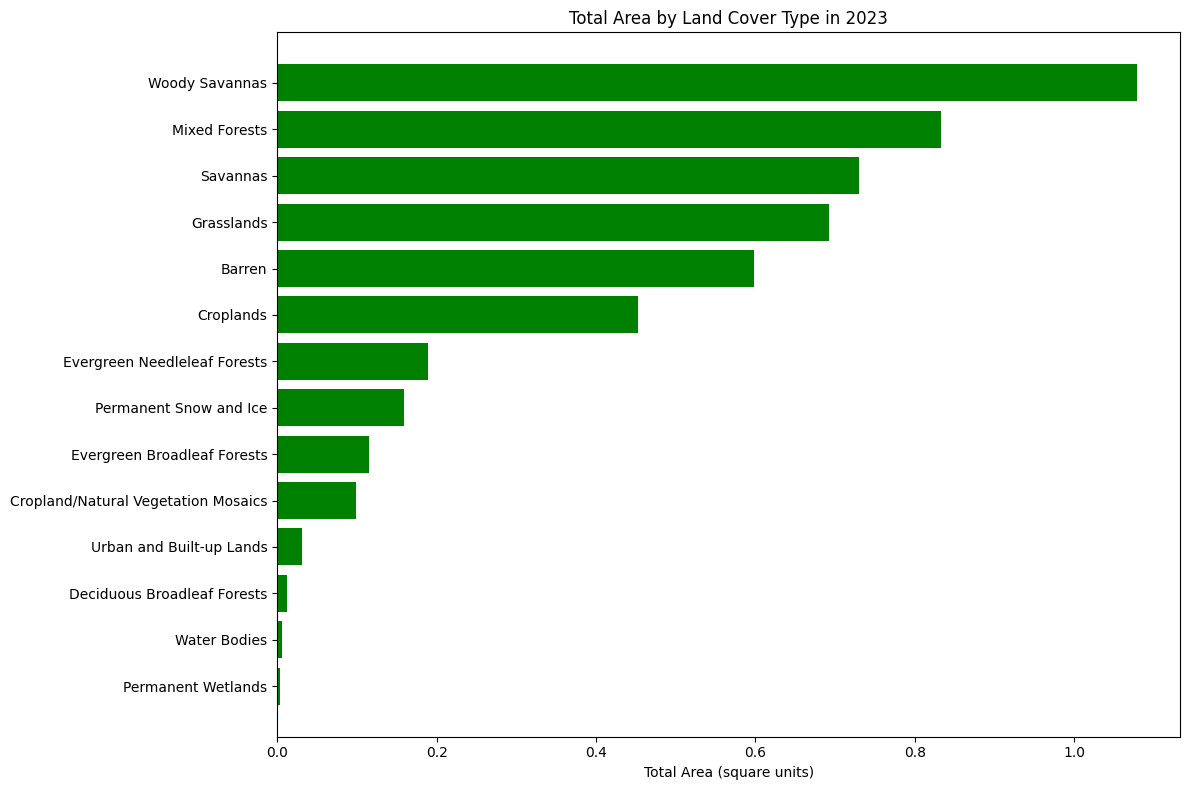

In [ ]:
# Plot total area by land cover type for a specific year
area_by_year = area_by_year_landcover[area_by_year_landcover['year'] == 2023].sort_values(by='area',ascending=True)

# Bar plot of areas by land cover type
plt.figure(figsize=(12, 8))
plt.barh(area_by_year['land_cover_type'], area_by_year['area'], color='green')
plt.xlabel('Total Area (square units)')
plt.title(f'Total Area by Land Cover Type in {year}')
plt.tight_layout()
plt.show()


Woody Savannas refer to a specific type of land cover or ecosystem characterized by a mix of trees (woody vegetation) and grassland. These ecosystems typically consist of scattered trees or shrubs interspersed with grasses and other herbaceous plants. The balance between trees and grasses can vary, but trees are usually not densely packed, allowing for open spaces dominated by grasses.

In [121]:
area_by_year

land_cover_type    Barren  Closed Shrublands  \
year                                           
2012             0.628287           0.000081   
2013             0.623707           0.000000   
2014             0.620338           0.000000   
2015             0.610897           0.000000   
2016             0.621529           0.000000   
2017             0.629679           0.000000   
2018             0.628005           0.000000   
2019             0.619309           0.000020   
2020             0.612813           0.000040   
2021             0.601274           0.000000   
2022             0.597461           0.000000   
2023             0.598288           0.000000   

land_cover_type  Cropland/Natural Vegetation Mosaics  Croplands  \
year                                                              
2012                                        0.074221   0.634743   
2013                                        0.078377   0.597198   
2014                                        0.076299   0.565948   
2015                                        0.083602   0.537241   
2016                                        0.095707   0.533085   
2017                                        0.102707   0.496105   
2018                                        0.103998   0.462091   
2019                                        0.088484   0.461627   
2020                                        0.088020   0.458904   
2021                                        0.081605   0.475043   
2022                                        0.074625   0.491667   
2023                                        0.098410   0.452448   

land_cover_type  Deciduous Broadleaf Forests  Evergreen Broadleaf Forests  \
year                                                                        
2012                                0.020880                     0.075391   
2013                                0.020275                     0.086285   
2014                                0.015030                     0.093992   
2015                                0.012407                     0.096211   
2016                                0.014425                     0.086769   
2017                                0.016684                     0.084833   
2018                                0.013497                     0.088847   
2019                                0.010934                     0.089473   
2020                                0.008150                     0.121066   
2021                                0.013739                     0.104482   
2022                                0.017047                     0.117273   
2023                                0.012790                     0.115679   

land_cover_type  Evergreen Needleleaf Forests  Grasslands  Mixed Forests  \
year                                                                       
2012                                 0.157722    0.763777       0.640291   
2013                                 0.174023    0.741444       0.687700   
2014                                 0.190183    0.752722       0.706846   
2015                                 0.200552    0.757806       0.706220   
2016                                 0.199402    0.754154       0.707693   
2017                                 0.196618    0.733415       0.737551   
2018                                 0.209348    0.714956       0.708217   
2019                                 0.205233    0.702649       0.749030   
2020                                 0.200088    0.719858       0.712938   
2021                                 0.186793    0.696799       0.808887   
2022                                 0.177574    0.680659       0.855752   
2023                                 0.189114    0.692159       0.833600   

land_cover_type  Open Shrublands  Permanent Snow and Ice  Permanent Wetlands  \
year                                                                           
2012                     0.00004                0.149310            0.002885   
2013

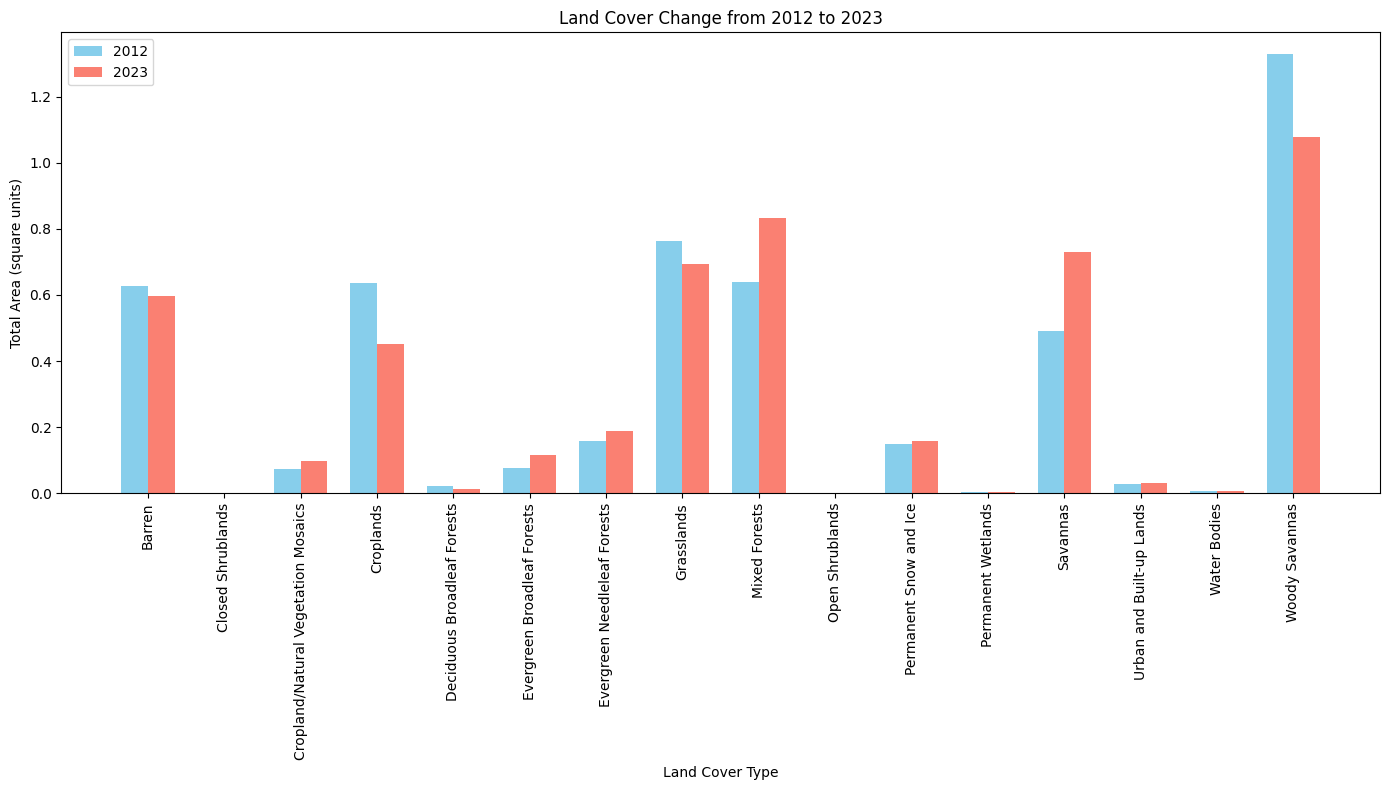

In [ ]:
# Filter data for years 2012 and 2023
gdf_2012 = gdf[gdf['year'] == 2012]
gdf_2023 = gdf[gdf['year'] == 2023]

# Calculate total area for each land cover type in 2012
area_2012 = gdf_2012.groupby('land_cover_type')['area'].sum().reset_index()

# Calculate total area for each land cover type in 2023
area_2023 = gdf_2023.groupby('land_cover_type')['area'].sum().reset_index()

# Merge both dataframes on land_cover_type to compare areas
area_comparison = pd.merge(area_2012, area_2023, on='land_cover_type', how='outer', suffixes=('_2012', '_2023'))

# Sort the data by the land cover type for better visualization
area_comparison = area_comparison.sort_values('land_cover_type')

# Plotting the comparison
plt.figure(figsize=(14, 8))

# Side-by-side bar plot comparing areas in 2012 and 2023
bar_width = 0.35
index = range(len(area_comparison))

plt.bar(index, area_comparison['area_2012'], bar_width, label='2012', color='skyblue')
plt.bar([i + bar_width for i in index], area_comparison['area_2023'], bar_width, label='2023', color='salmon')

# Labeling the plot
plt.xlabel('Land Cover Type')
plt.ylabel('Total Area (square units)')
plt.title('Land Cover Change from 2012 to 2023')
plt.xticks([i + bar_width / 2 for i in index], area_comparison['land_cover_type'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


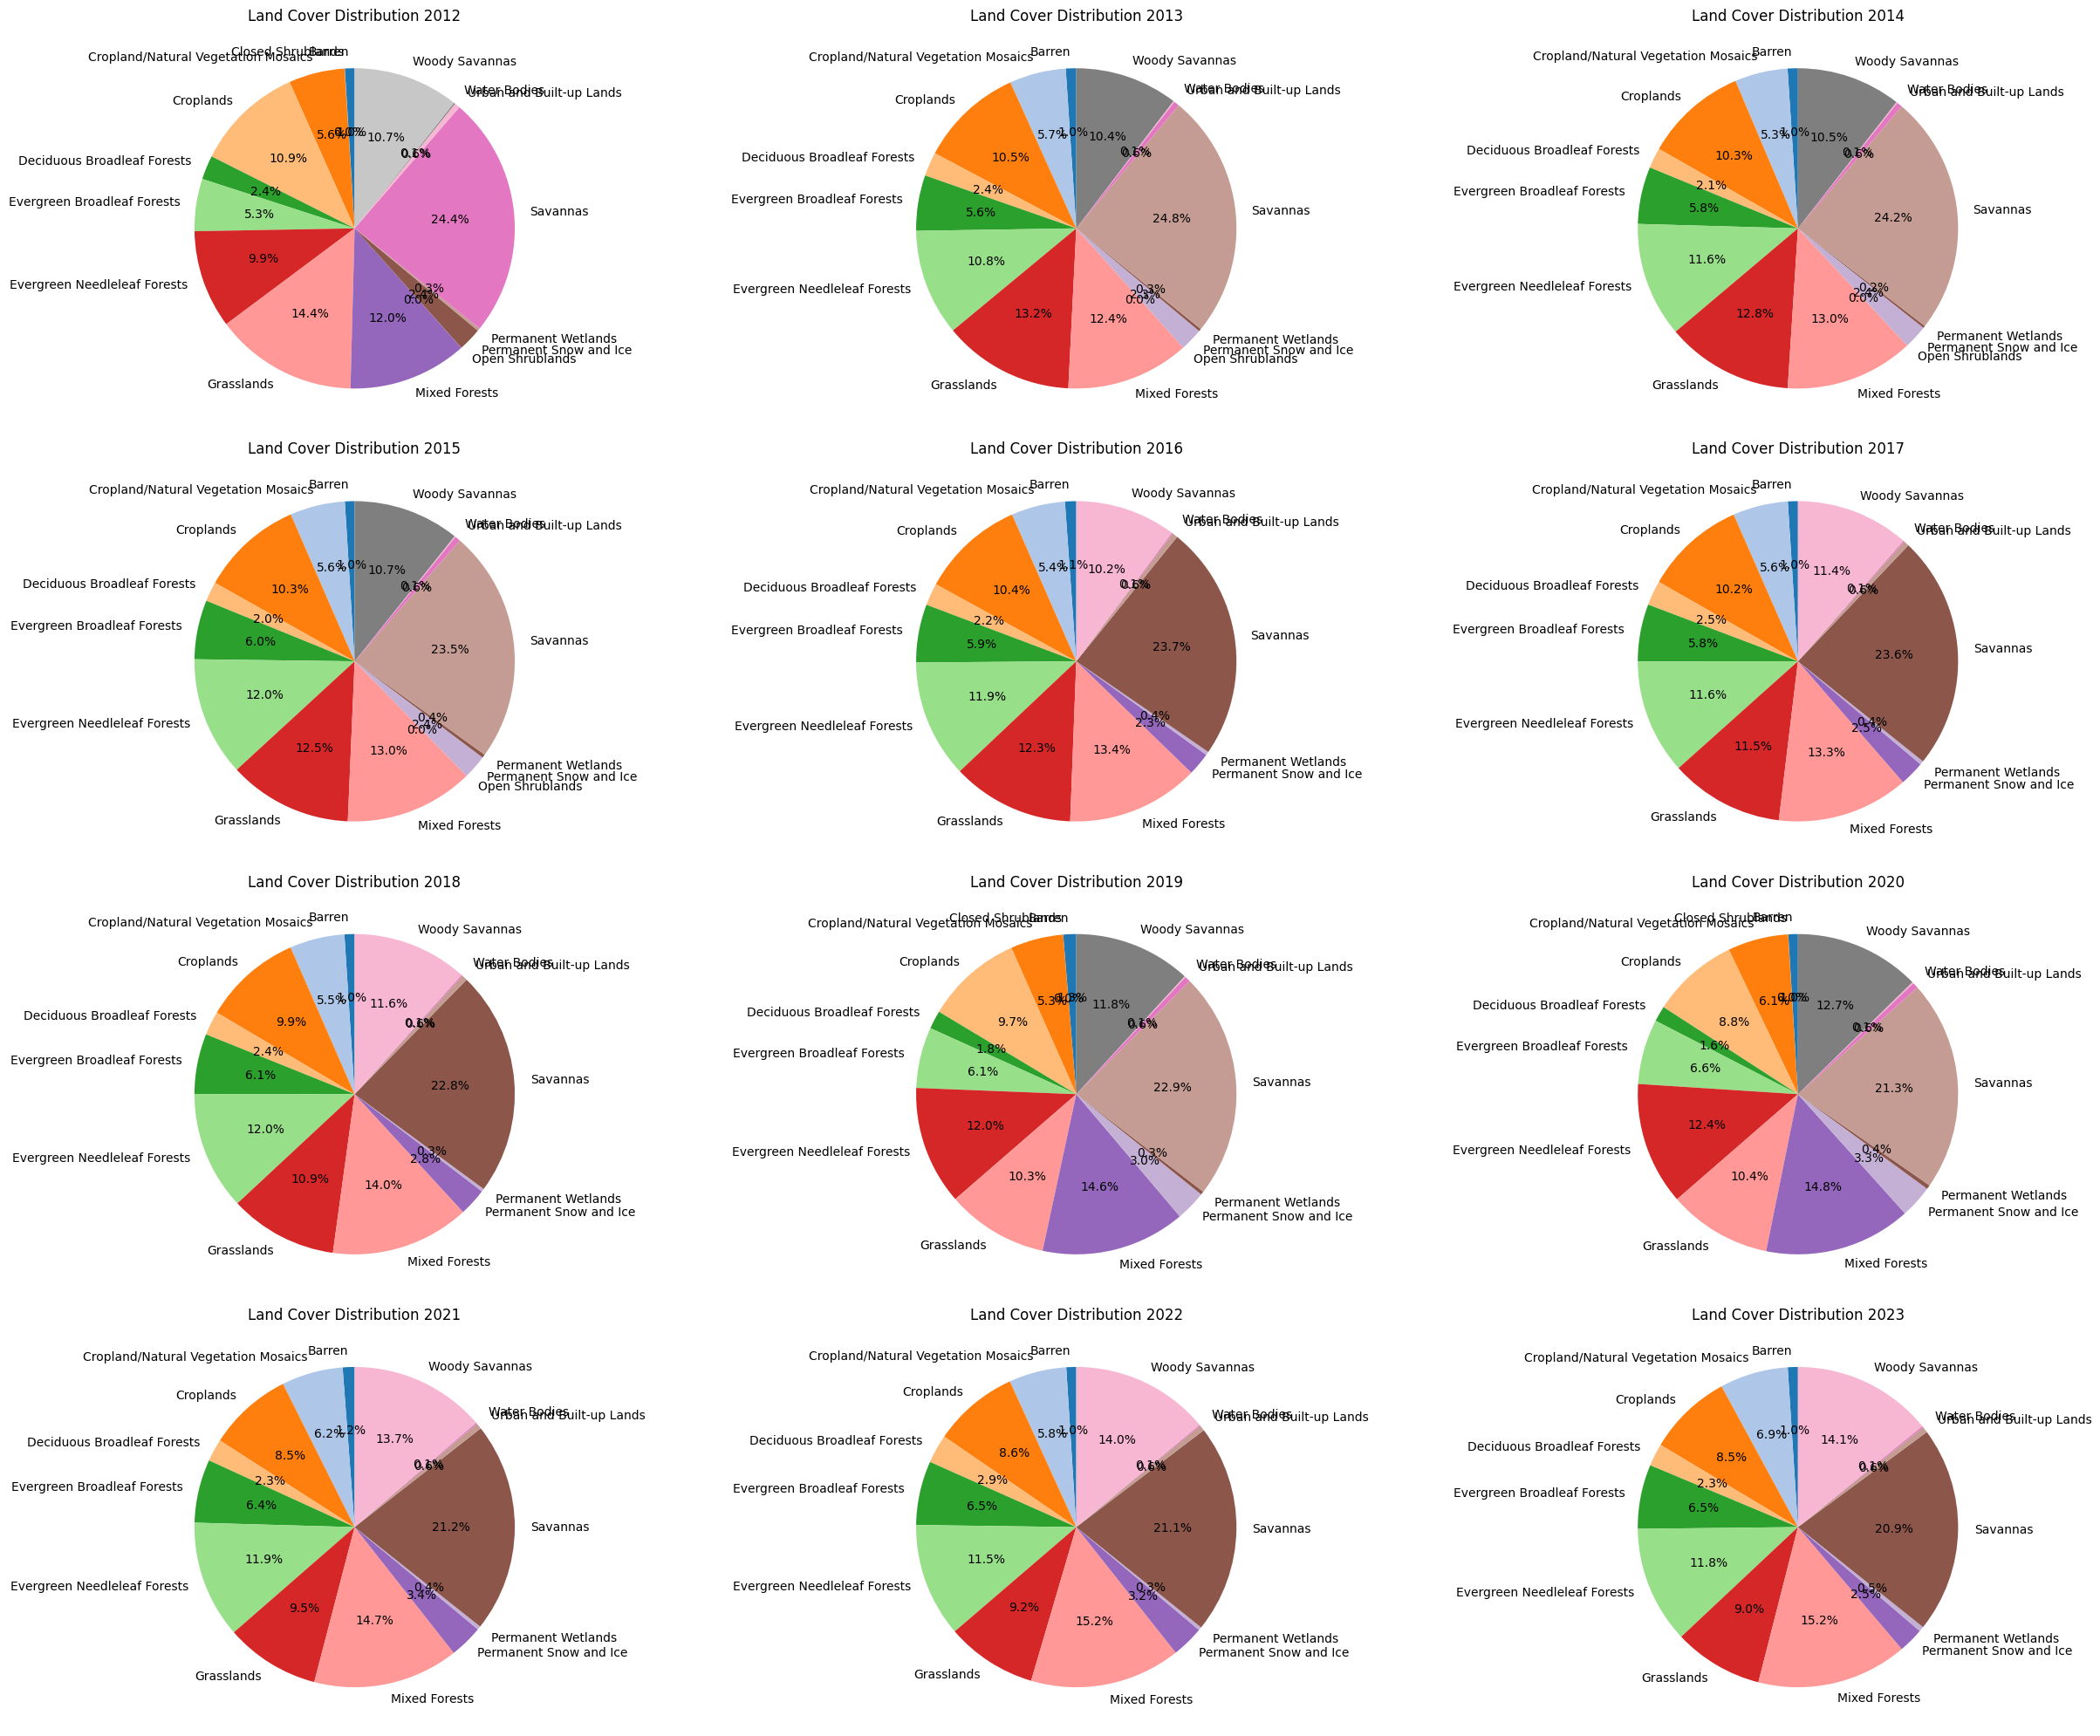

In [ ]:
# Group the data by year and land_cover_type, then count the occurrences (or areas if you want)
land_cover_counts = gdf.groupby(['year', 'land_cover_type']).size().reset_index(name='count')

# Get a list of unique years
years = sorted(gdf['year'].unique())

# Set up the plot layout: create a grid of subplots (one for each year)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))  # Adjust grid size to fit all years
axes = axes.flatten()  # Flatten to make it easier to iterate through

# Loop through each year and plot the pie chart
for i, year in enumerate(years):
    # Filter data for the specific year
    year_data = land_cover_counts[land_cover_counts['year'] == year]

    # Calculate the percentages for the land cover types
    total_count = year_data['count'].sum()
    percentages = year_data['count'] / total_count * 100

    # Plot the pie chart for the current year
    ax = axes[i]
    ax.pie(percentages, labels=year_data['land_cover_type'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors[:len(year_data)])
    ax.set_title(f'Land Cover Distribution {year}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the area for each land cover type in both years
area_2012 = gdf[gdf['year'] == 2012].groupby('land_cover_type')['area'].sum()
area_2023 = gdf[gdf['year'] == 2023].groupby('land_cover_type')['area'].sum()

# Calculate the difference
change = area_2023 - area_2012
change_percentage = (change / area_2012) * 100
print(change_percentage)

land_cover_type
Barren                                 -4.774749
Closed Shrublands                            NaN
Cropland/Natural Vegetation Mosaics    32.590378
Croplands                             -28.719448
Deciduous Broadleaf Forests           -38.743961
Evergreen Broadleaf Forests            53.438587
Evergreen Needleleaf Forests           19.902788
Grasslands                             -9.376898
Mixed Forests                          30.190938
Open Shrublands                              NaN
Permanent Snow and Ice                  6.647750
Permanent Wetlands                     25.874126
Savannas                               48.500513
Urban and Built-up Lands               12.288447
Water Bodies                           -5.044510
Woody Savannas                        -18.766043
Name: area, dtype: float64


**Plotting Area Over Time**

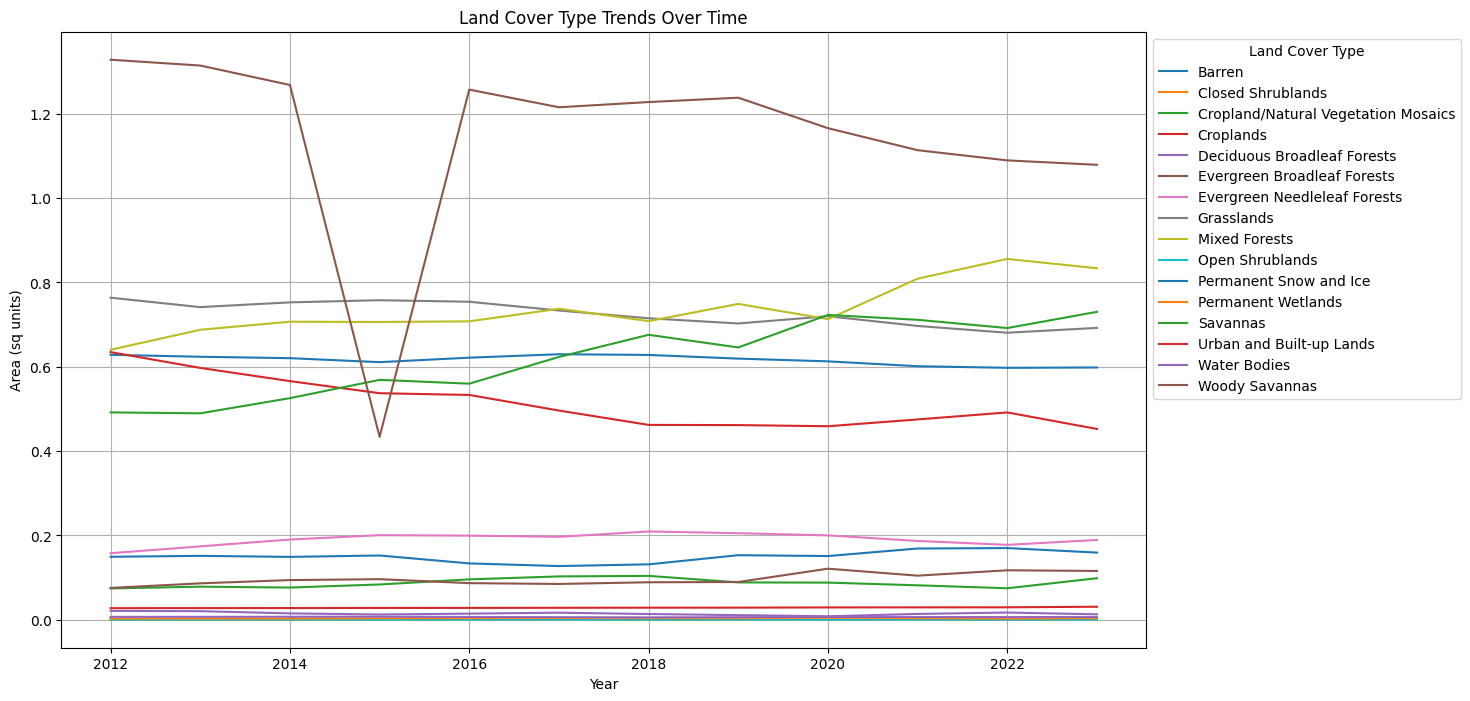

In [123]:
# Group by year and land cover type, and calculate the area for each group
area_by_year = gdf.groupby(['year', 'land_cover_type'])['area'].sum().unstack().fillna(0)

# Plot the trends
area_by_year.plot(kind='line', figsize=(14, 8))
plt.title('Land Cover Type Trends Over Time')
plt.ylabel('Area (sq units)')
plt.xlabel('Year')
plt.legend(title='Land Cover Type',loc='upper left',bbox_to_anchor=(1, 1), fontsize=10)
plt.grid("on")
plt.show()

In [125]:
area_by_year

land_cover_type    Barren  Closed Shrublands  \
year                                           
2012             0.628287           0.000081   
2013             0.623707           0.000000   
2014             0.620338           0.000000   
2015             0.610897           0.000000   
2016             0.621529           0.000000   
2017             0.629679           0.000000   
2018             0.628005           0.000000   
2019             0.619309           0.000020   
2020             0.612813           0.000040   
2021             0.601274           0.000000   
2022             0.597461           0.000000   
2023             0.598288           0.000000   

land_cover_type  Cropland/Natural Vegetation Mosaics  Croplands  \
year                                                              
2012                                        0.074221   0.634743   
2013                                        0.078377   0.597198   
2014                                        0.076299   0.565948   
2015                                        0.083602   0.537241   
2016                                        0.095707   0.533085   
2017                                        0.102707   0.496105   
2018                                        0.103998   0.462091   
2019                                        0.088484   0.461627   
2020                                        0.088020   0.458904   
2021                                        0.081605   0.475043   
2022                                        0.074625   0.491667   
2023                                        0.098410   0.452448   

land_cover_type  Deciduous Broadleaf Forests  Evergreen Broadleaf Forests  \
year                                                                        
2012                                0.020880                     0.075391   
2013                                0.020275                     0.086285   
2014                                0.015030                     0.093992   
2015                                0.012407                     0.096211   
2016                                0.014425                     0.086769   
2017                                0.016684                     0.084833   
2018                                0.013497                     0.088847   
2019                                0.010934                     0.089473   
2020                                0.008150                     0.121066   
2021                                0.013739                     0.104482   
2022                                0.017047                     0.117273   
2023                                0.012790                     0.115679   

land_cover_type  Evergreen Needleleaf Forests  Grasslands  Mixed Forests  \
year                                                                       
2012                                 0.157722    0.763777       0.640291   
2013                                 0.174023    0.741444       0.687700   
2014                                 0.190183    0.752722       0.706846   
2015                                 0.200552    0.757806       0.706220   
2016                                 0.199402    0.754154       0.707693   
2017                                 0.196618    0.733415       0.737551   
2018                                 0.209348    0.714956       0.708217   
2019                                 0.205233    0.702649       0.749030   
2020                                 0.200088    0.719858       0.712938   
2021                                 0.186793    0.696799       0.808887   
2022                                 0.177574    0.680659       0.855752   
2023                                 0.189114    0.692159       0.833600   

land_cover_type  Open Shrublands  Permanent Snow and Ice  Permanent Wetlands  \
year                                                                           
2012                     0.00004                0.149310            0.002885   
2013

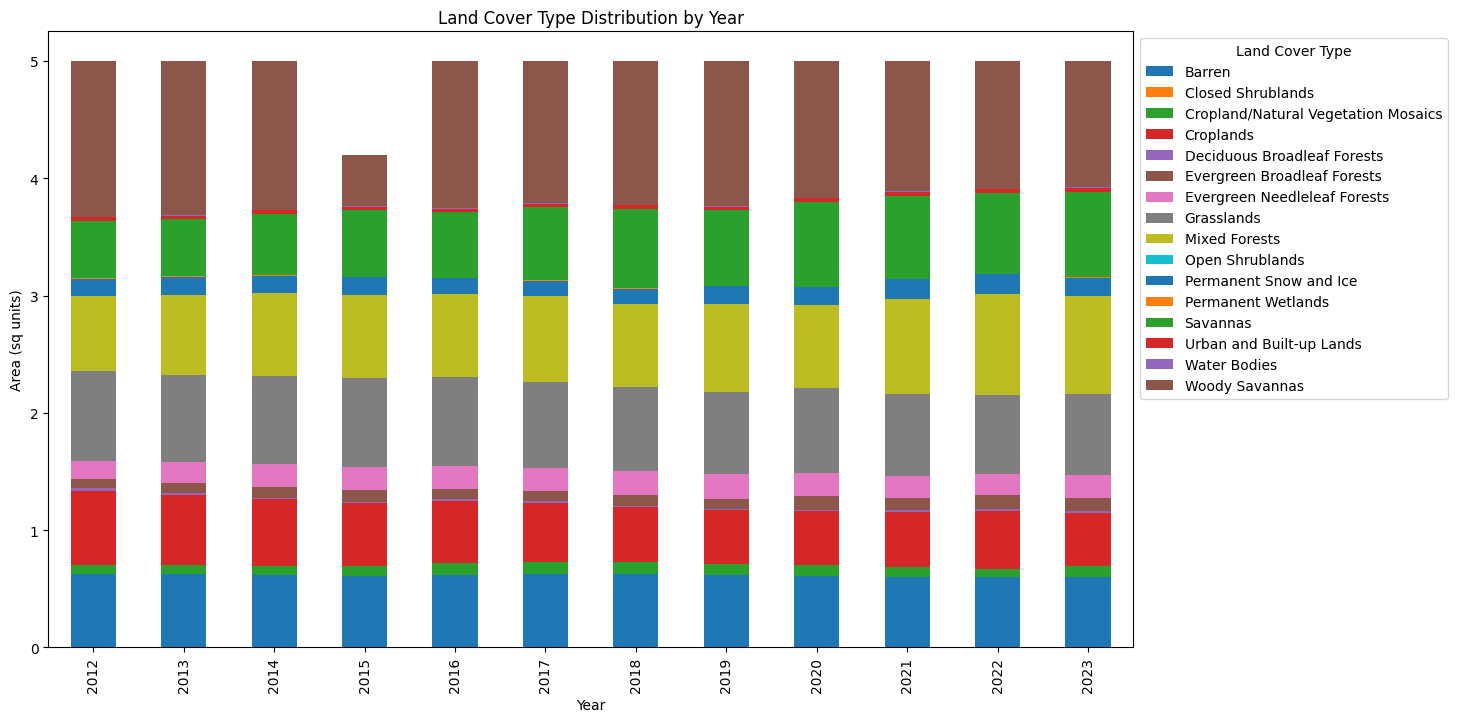

In [ ]:
# Using a similar technique, you can plot stacked bar charts:
area_by_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Land Cover Type Distribution by Year')
plt.ylabel('Area (sq units)')
plt.xlabel('Year')
plt.legend(title='Land Cover Type',bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

**land cover data for 2023.**

In [126]:
gdf_2023.head(2)

system:index  count  label  \
138149  +17271+6770      1     12   
138150  +17274+6772     12      9   

                                                     .geo  year  \
138149  {"geodesic":false,"type":"Polygon","coordinate...  2023   
138150  {"geodesic":false,"type":"Polygon","coordinate...  2023   

                                                 geometry land_cover_type  \
138149  POLYGON ((77.574 30.408, 77.579 30.408, 77.579...       Croplands   
138150  POLYGON ((77.583 30.421, 77.583 30.417, 77.579...        Savannas   

            area  
138149  0.000020  
138150  0.000242

**Installing the rasterio library for visualising the Geotiff files**

In [ ]:
! pip install rasterio --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.7 MB/s eta 0:00:00


**Plot of the land cover Tif files from 2012 to 2023**

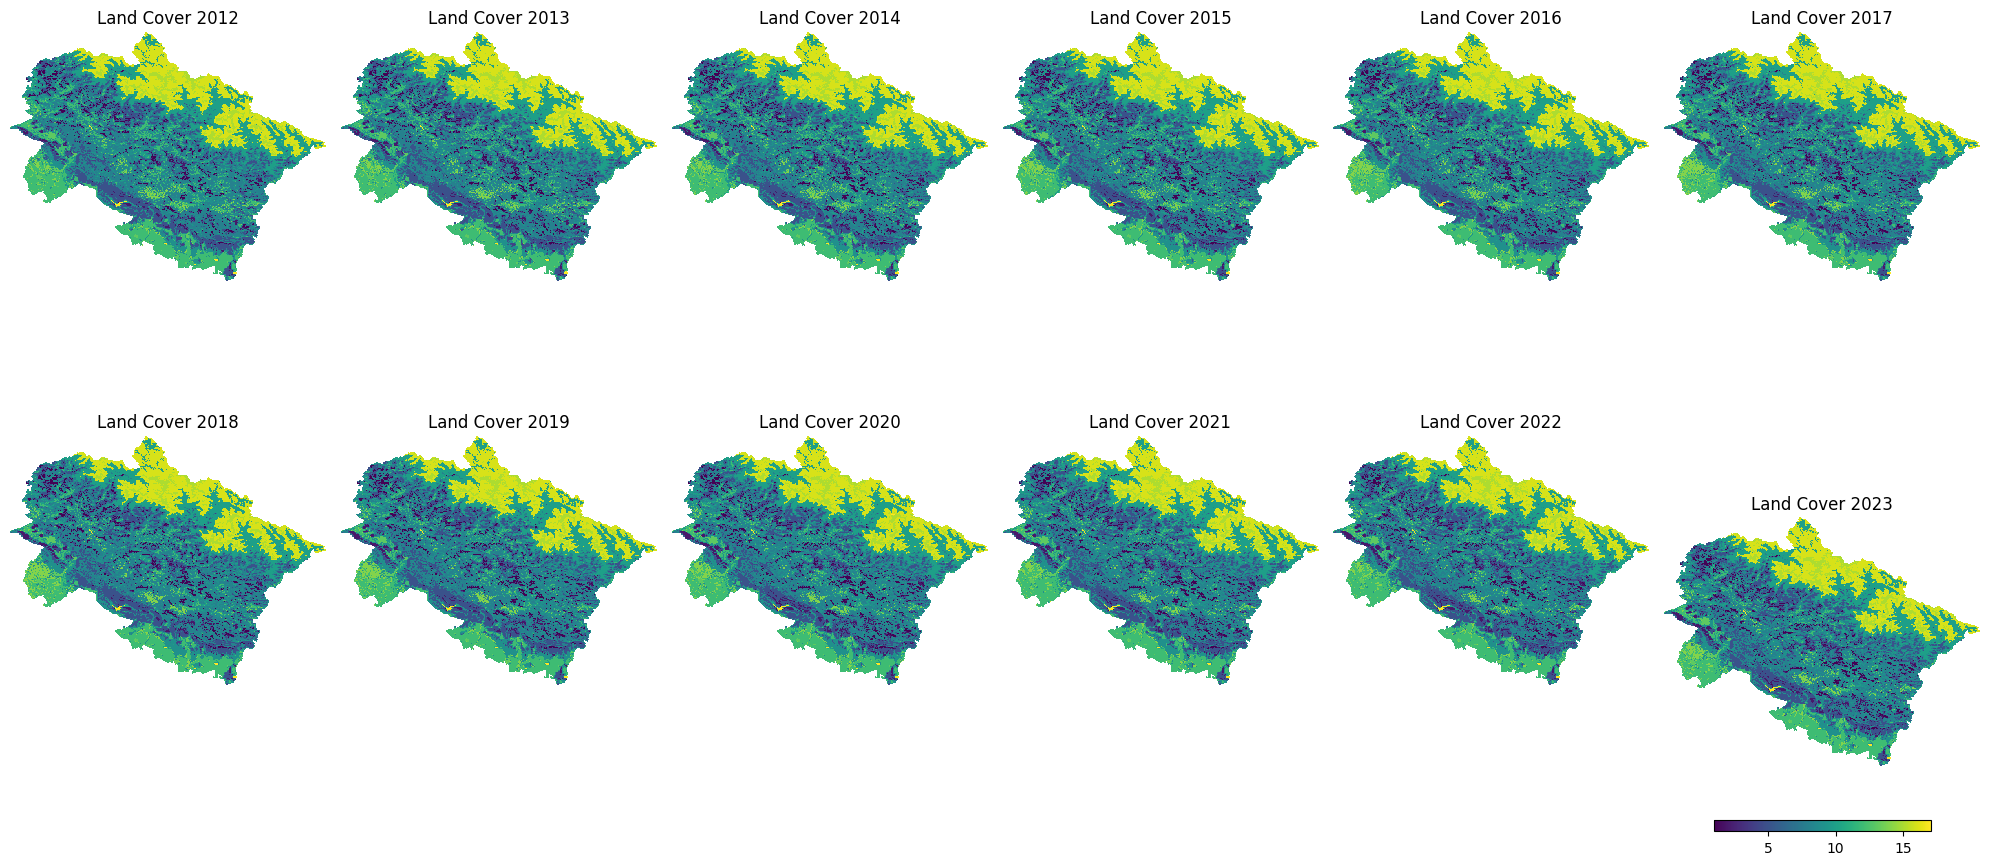

In [ ]:
import rasterio

# Define the path to your .tif files (make sure they are named consistently, e.g., 'landcover_2012.tif', etc.)
tif_directory = '/content/drive/MyDrive/Omdena Modis_Land_cover_2012_2023/'  # Replace with the path to your .tif files

# List all the .tif files
years = range(2012, 2024)  # Years 2012 to 2023
tif_files = [os.path.join(tif_directory, f"MODIS_Image_{year}.tif") for year in years]

# Create a figure for the subplots
fig, axes = plt.subplots(2, 6, figsize=(20, 10))  # Adjust rows and columns as needed
axes = axes.flatten()  # Flatten to make it easier to iterate through

# Loop through each year, read the .tif file, and plot it
for i, tif_file in enumerate(tif_files):
    with rasterio.open(tif_file) as src:
        # Read the data from the raster file
        data = src.read(1)  # Assuming single-band raster (if it's multi-band, select the appropriate band)

        # Normalize data if needed (optional, based on the data range)
        data = np.ma.masked_equal(data, 0)  # Mask out the zero values (if they represent no data)

        # Plot the data for the specific year
        ax = axes[i]
        im = ax.imshow(data, cmap='viridis', interpolation='nearest')
        ax.set_title(f'Land Cover {years[i]}')
        ax.axis('off')  # Turn off axis for a cleaner map

        # Optionally, add a colorbar
        if i == len(tif_files) - 1:  # Only add colorbar once
            fig.colorbar(im, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


**Plot of the Land cover data for 2023.**

Raster Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 775, 'height': 611, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004491576420597608, 0.0, 77.56952478372068,
       0.0, -0.004491576420597608, 31.46349282628624)}


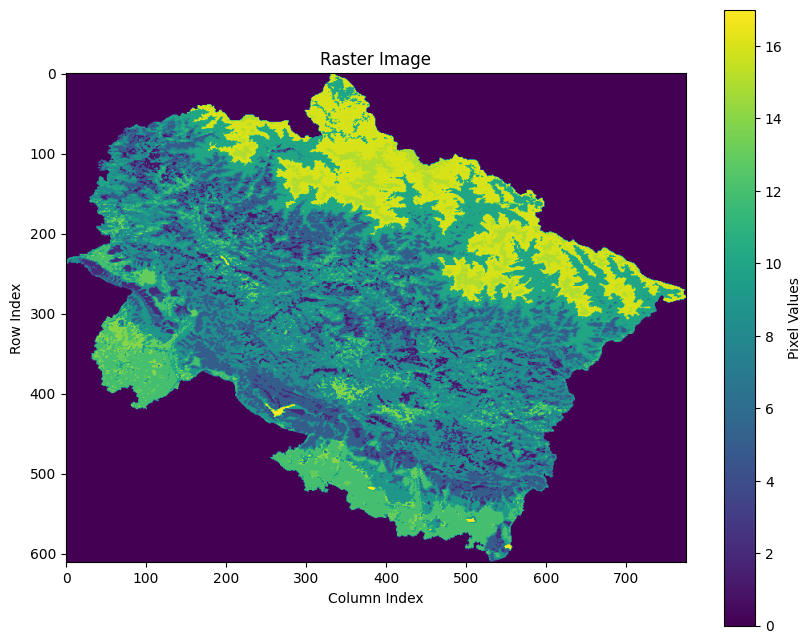

In [ ]:
with rasterio.open("/content/drive/MyDrive/Omdena Modis_Land_cover_2012_2023/MODIS_Image_2023.tif") as src:
      # Read the data from the raster file
      data = src.read(1)
      metadata = src.meta

# Display metadata (optional)
print("Raster Metadata:")
print(metadata)

# Plot the raster
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='viridis')  # Choose a suitable colormap like 'viridis', 'gray', etc.
plt.colorbar(label='Pixel Values')
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

## Analyzing the Active fire data of 2024 with the Land cover 2023 dataset.

**Reading the active fire points data for 2024 with 500m spatial resolution.**

In [80]:
# Load the fire points CSV (assuming lat/lon columns are named 'lat' and 'lon')
fire_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Suomi_VIIRS_Daily_Samples_2024.csv')


**Converting the dataframe into a geodataframe with geometry column.**

In [81]:
import json
from shapely.geometry import shape

# Function to parse the GeoJSON-like string and extract only the geometry
def parse_geojson(geojson_str):
    # Convert the string to a Python dictionary
    geo_dict = json.loads(geojson_str)
    # Extract the geometry (type and coordinates)
    geometry = {
        'type': geo_dict['type'],
        'coordinates': geo_dict['coordinates']
    }
    return geometry

# Apply the function to parse the 'geo' column
fire_df['geometry'] = fire_df['.geo'].apply(parse_geojson)

# Convert the parsed 'geometry' column to actual geometries using Shapely
fire_df['geometry'] = fire_df['geometry'].apply(lambda x: shape(x))  # Convert to Shapely geometry

# Now, create a GeoDataFrame
fire_gdf = gpd.GeoDataFrame(fire_df, geometry='geometry')

# Display the GeoDataFrame
fire_gdf


system:index  Bright_ti4  Bright_ti5  DayNight     acq_epoch  acq_time  \
0         2024001_0      348.76      291.52         1  1.704099e+09     31500   
1         2024001_1      348.76      291.52         1  1.704099e+09     31500   
2         2024001_2      348.76      291.52         1  1.704099e+09     31500   
3         2024001_3      348.76      291.52         1  1.704099e+09     31500   
4         2024001_4      333.29      293.88         1  1.704093e+09     25500   
...             ...         ...         ...       ...           ...       ...   
142053  2024303_319      345.72      301.81         1  1.730188e+09     27660   
142054  2024303_320      345.72      301.81         1  1.730188e+09     27660   
142055  2024303_321      345.72      301.81         1  1.730188e+09     27660   
142056  2024303_322      345.72      301.81         1  1.730188e+09     27660   
142057  2024303_323      345.72      301.81         1  1.730188e+09     27660   

        confidence        date    frp  line_number  \
0                1  2024-01-01  11.08        10130   
1                1  2024-01-01  11.08        10130   
2                1  2024-01-01  11.08        10130   
3                1  2024-01-01  11.08        10130   
4                1  2024-01-01   6.93         9559   
...            ...         ...    ...          ...   
142053           1  2024-10-29   5.47        12342   
142054           1  2024-10-29   5.47        12342   
142055           1  2024-10-29   5.47        12342   
142056           1  2024-10-29   5.47        12342   
142057           1  2024-10-29   5.47        12342   

                                                     .geo  \
0       {"geodesic":false,"type":"Point","coordinates"...   
1       {"geodesic":false,"type":"Point","coordinates"...   
2       {"geodesic":false,"type":"Point","coordinates"...   
3       {"geodesic":false,"type":"Point","coordinates"...   
4       {"geodesic":false,"type":"Point","coordinates"...   
...                                                   ...   
142053  {"geodesic":false,"type":"Point","coordinates"...   
142054  {"geodesic":false,"type":"Point","coordinates"...   
142055  {"geodesic":false,"type":"Point","coordinates"...   
142056  {"geodesic":false,"type":"Point","coordinates"...   
142057  {"geodesic":false,"type":"Point","coordinates"...   

                         geometry  
0       POINT (78.19683 31.08326)  
1       POINT (78.20208 31.08326)  
2       POINT (78.20733 31.08326)  
3       POINT (78.21258 31.08326)  
4       POINT (78.21784 31.08326)  
...                           ...  
142053  POINT (79.95484 28.76301)  
142054  POINT (79.94627 28.75852)  
142055   POINT (79.9514 28.75852)  
142056  POINT (79.94283 28.75402)  
142057  POINT (79.94796 28.75402)  

[142058 rows x 12 columns]

**Ensure the CRS of both the data is the same.**

In [82]:
fire_gdf = fire_gdf.set_crs(epsg=32644)

In [127]:
fire_gdf = fire_gdf[fire_gdf.is_valid]

In [128]:
fire_gdf.shape

(142058, 12)

In [84]:
gdf_2023.columns

Index(['system:index', 'count', 'label', '.geo', 'year', 'geometry',
       'land_cover_type', 'area'],
      dtype='object')

In [ ]:
fire_gdf.columns

Index(['system:index', 'Bright_ti4', 'Bright_ti5', 'DayNight', 'acq_epoch',
       'acq_time', 'confidence', 'date', 'frp', 'line_number', '.geo',
       'geometry'],
      dtype='object')

**Spatial join of active fire points data of 2024 with 500 m resolution and land cover data 2023 with 500 m spatial resolution.**

In [83]:
# Perform a spatial join between the land cover data and the fire grid (aggregated fire points)
land_cover_fire_join = gpd.sjoin(fire_gdf, gdf_2023, how='inner', predicate='within')

In [85]:
land_cover_fire_join.head(2)

system:index_left  Bright_ti4  Bright_ti5  DayNight     acq_epoch  acq_time  \
0         2024001_0      348.76      291.52         1  1.704099e+09     31500   
1         2024001_1      348.76      291.52         1  1.704099e+09     31500   

   confidence        date    frp  line_number  \
0           1  2024-01-01  11.08        10130   
1           1  2024-01-01  11.08        10130   

                                           .geo_left               geometry  \
0  {"geodesic":false,"type":"Point","coordinates"...  POINT (78.197 31.083)   
1  {"geodesic":false,"type":"Point","coordinates"...  POINT (78.202 31.083)   

   index_right system:index_right  count  label  \
0       140303        +17421+6921     32     10   
1       140303        +17421+6921     32     10   

                                          .geo_right  year land_cover_type  \
0  {"geodesic":false,"type":"Polygon","coordinate...  2023      Grasslands   
1  {"geodesic":false,"type":"Polygon","coordinate...  2023      Grasslands   

       area  
0  0.000646  
1  0.000646

In [86]:
land_cover_fire_join.columns

Index(['system:index_left', 'Bright_ti4', 'Bright_ti5', 'DayNight',
       'acq_epoch', 'acq_time', 'confidence', 'date', 'frp', 'line_number',
       '.geo_left', 'geometry', 'index_right', 'system:index_right', 'count',
       'label', '.geo_right', 'year', 'land_cover_type', 'area'],
      dtype='object')

In [94]:
land_cover_fire_join.drop('year',axis=1, inplace=True)

In [95]:
land_cover_fire_join.columns

Index(['system:index_left', 'Bright_ti4', 'Bright_ti5', 'DayNight',
       'acq_epoch', 'acq_time', 'confidence', 'date', 'frp', 'line_number',
       '.geo_left', 'geometry', 'index_right', 'system:index_right', 'count',
       'label', '.geo_right', 'land_cover_type', 'area'],
      dtype='object')

**Map of Fire Points Overlayed on Land Cover:** Visualize the spatial distribution of active fire points over the land cover polygons.

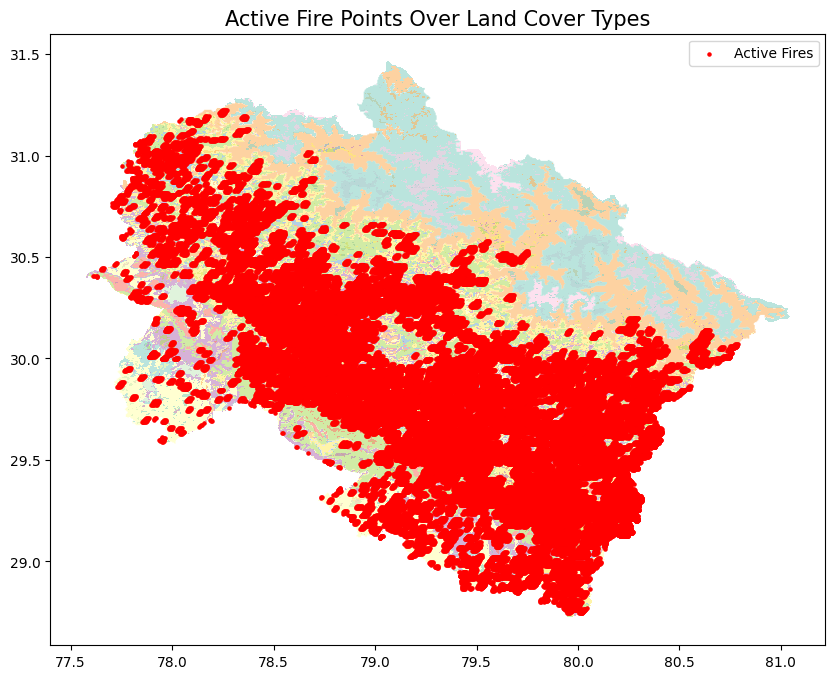

In [96]:
# Plot land cover polygons
fig, ax = plt.subplots(figsize=(10, 10))
gdf_2023.plot(ax=ax, column='land_cover_type', legend=True, cmap='Set3', alpha=0.6)

# Overlay fire points on top of the land cover map
fire_gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='Active Fires')

ax.set_title('Active Fire Points Over Land Cover Types', fontsize=15)
ax.legend()
plt.show()


**Fire Points by Day/Night (Using the DayNight Column):** Visualize the distribution of fires during the day and night based on the DayNight column.

<ipython-input-118-a2e8d2e407e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayNight', y='count', data=fire_counts_by_daynight, palette='Set2')


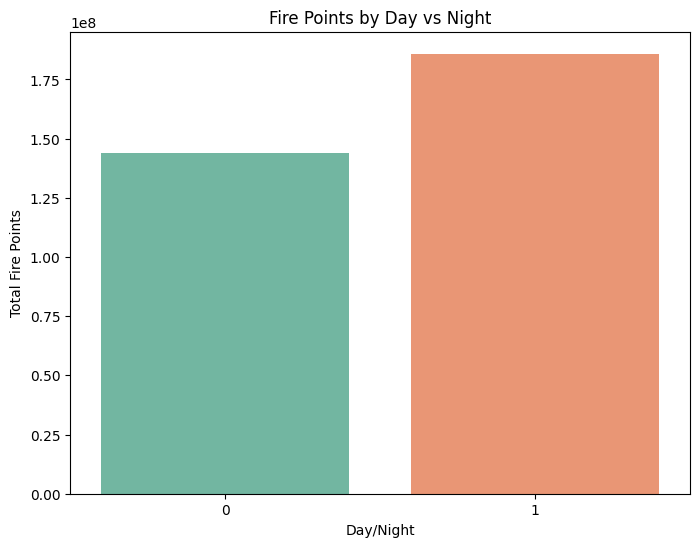

In [118]:
# Group by DayNight and sum the fire counts
fire_counts_by_daynight = land_cover_fire_join.groupby('DayNight')['count'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='DayNight', y='count', data=fire_counts_by_daynight, palette='Set2')
plt.title('Fire Points by Day vs Night')
plt.xlabel('Day/Night')
plt.ylabel('Total Fire Points')
plt.show()


**Fire Area vs. Land Cover Type:** Explore the relationship between the area affected by fires and the land cover type.

<ipython-input-90-ba438b1c21fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='land_cover_type', y='area', data=area_by_land_cover, palette='viridis')


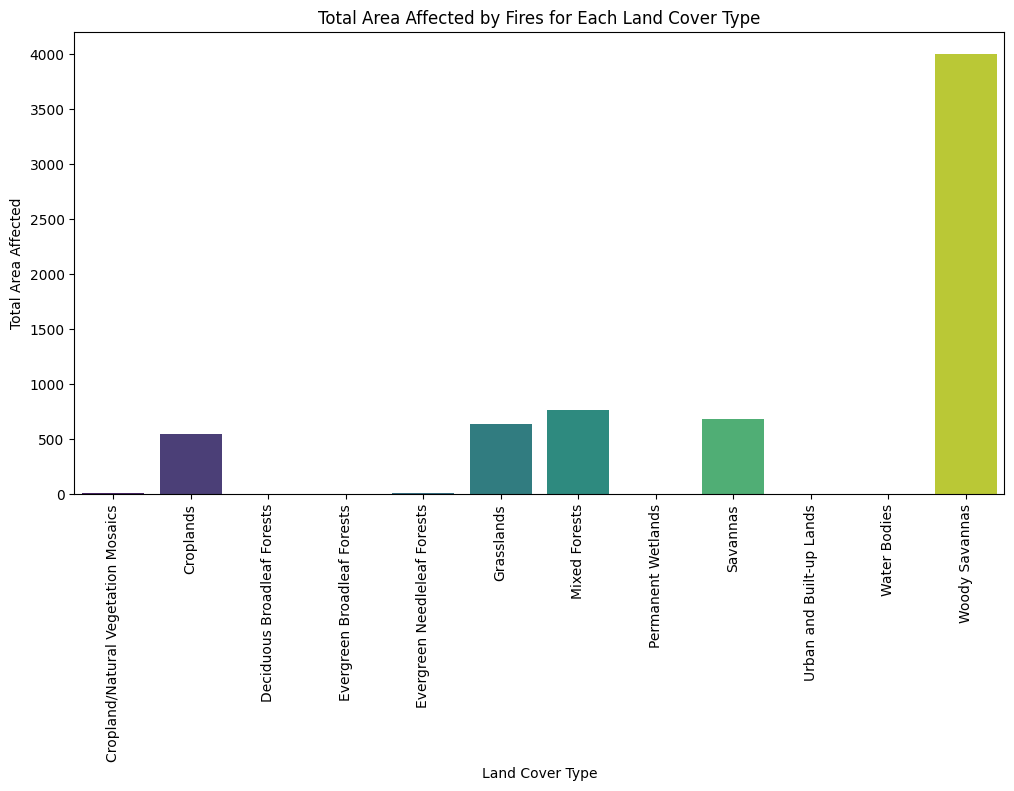

In [90]:
import seaborn as sns
# Group by land cover type and sum the area
area_by_land_cover = land_cover_fire_join.groupby('land_cover_type')['area'].sum().reset_index()

# Plot the total fire area by land cover type
plt.figure(figsize=(12, 6))
sns.barplot(x='land_cover_type', y='area', data=area_by_land_cover, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Area Affected by Fires for Each Land Cover Type')
plt.xlabel('Land Cover Type')
plt.ylabel('Total Area Affected')
plt.show()


**Fire Radiative Power (FRP) vs. Land Cover Type:** Analyze how the intensity of fires (FRP) varies across different land cover types.

<ipython-input-91-20ee48c96e1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='land_cover_type', y='frp', data=land_cover_fire_join, palette='Set1')


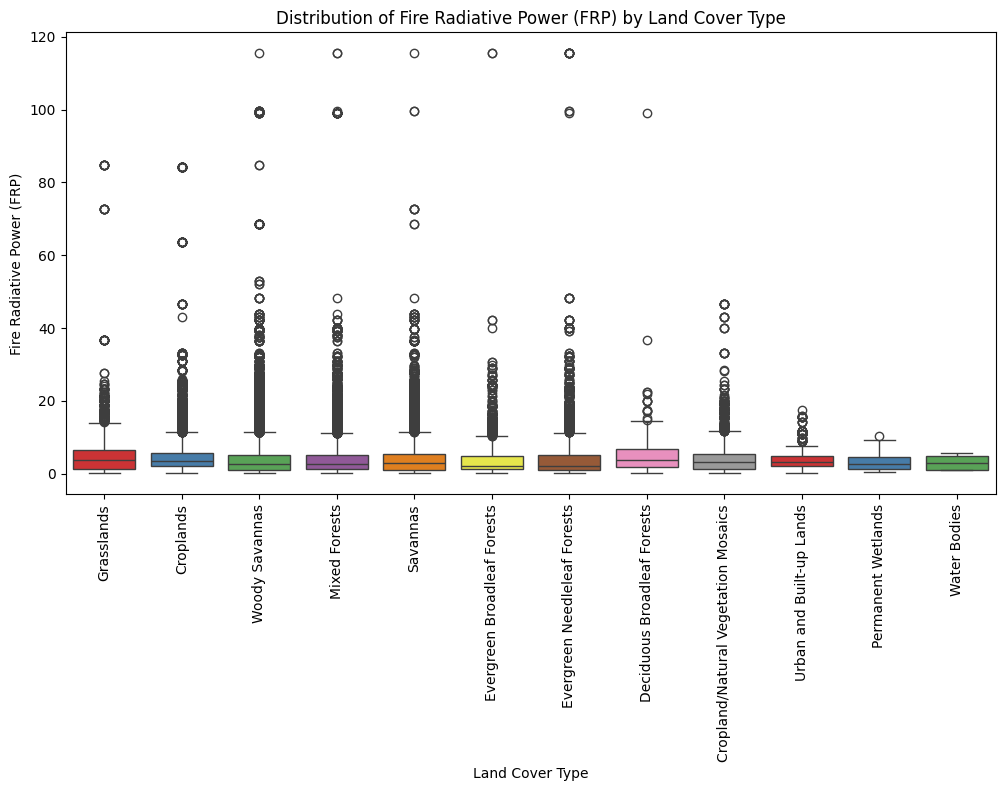

In [91]:
# Boxplot of FRP by land cover type
plt.figure(figsize=(12, 6))
sns.boxplot(x='land_cover_type', y='frp', data=land_cover_fire_join, palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Fire Radiative Power (FRP) by Land Cover Type')
plt.xlabel('Land Cover Type')
plt.ylabel('Fire Radiative Power (FRP)')
plt.show()


**Fire Points Density Heatmap:** Visualize the spatial density of fire points to identify areas with high fire frequency.

In [117]:
import folium
from folium.plugins import HeatMap

# Extract the coordinates of the fire points
fire_coords = [(point.y, point.x) for point in land_cover_fire_join.geometry]

# Create the map centered around the average location of the fire points
map = folium.Map(location=[land_cover_fire_join.geometry.y.mean(), land_cover_fire_join.geometry.x.mean()], zoom_start=6)

# Add the heatmap layer
HeatMap(fire_coords).add_to(map)

# Display the map
map


**Fire Area Distribution by Confidence:** Understand if there’s a relationship between fire area and confidence levels (i.e., fires with higher confidence may have larger or smaller affected areas).

<ipython-input-98-c6ed09079dfe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='confidence', y='area', data=land_cover_fire_join, palette='Set1')


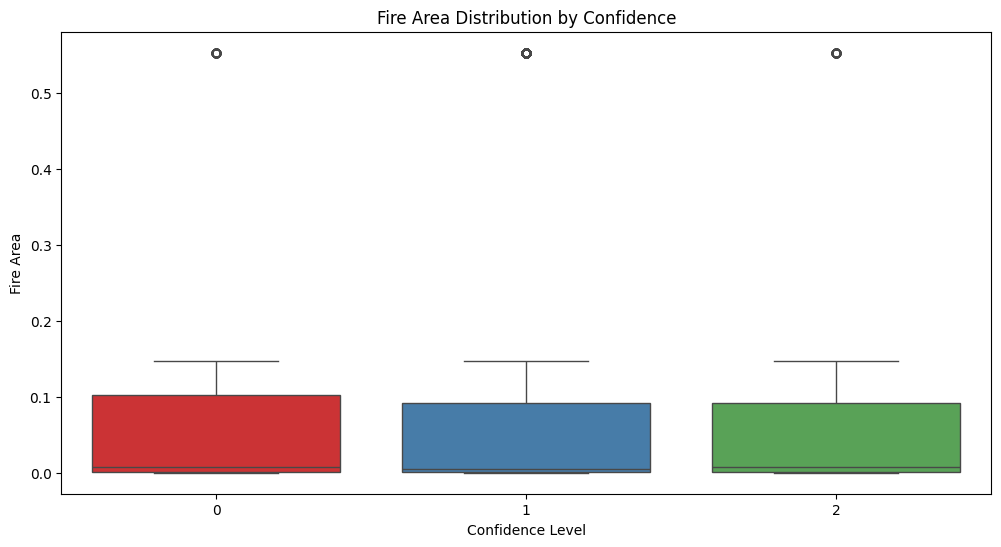

In [98]:
# Boxplot of Fire Area by Confidence Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='confidence', y='area', data=land_cover_fire_join, palette='Set1')
plt.title('Fire Area Distribution by Confidence')
plt.xlabel('Confidence Level')
plt.ylabel('Fire Area')
plt.show()


**Pie Chart of Fire Area by Land Cover Type**

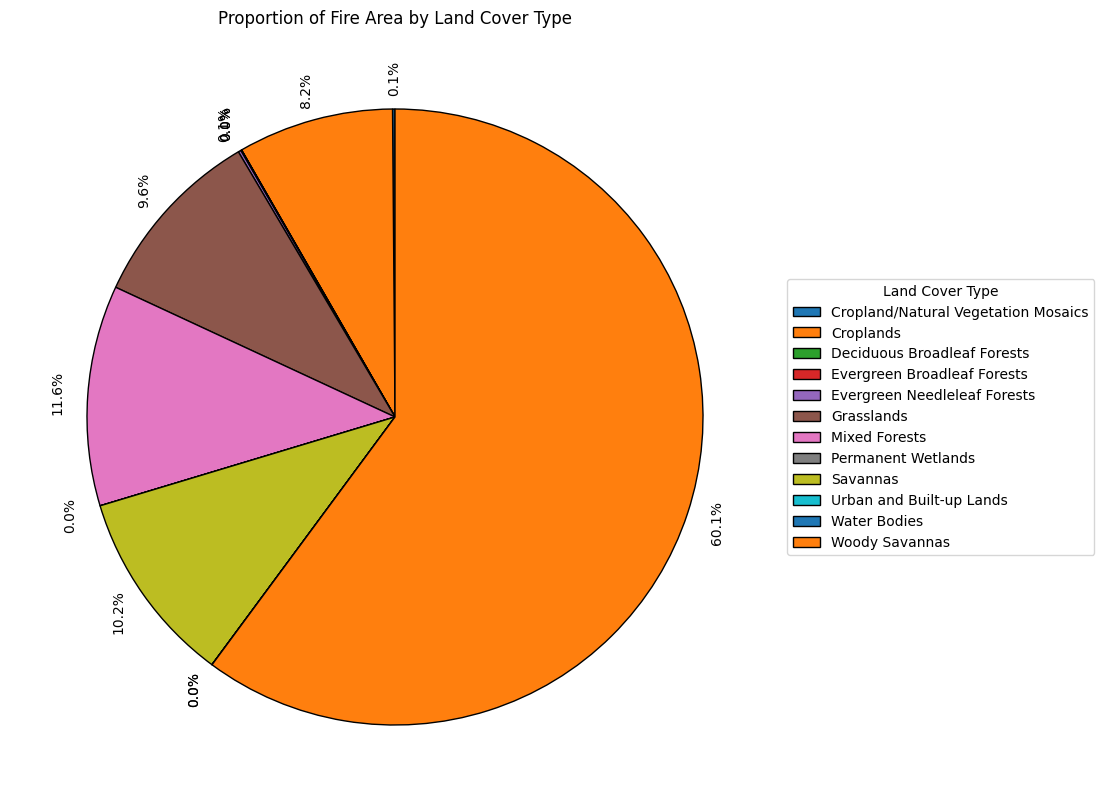

In [99]:
# Get the total area by land cover type
fire_area_by_land_cover = land_cover_fire_join.groupby('land_cover_type')['area'].sum()

# Plot the pie chart without the autopct labels
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    fire_area_by_land_cover,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

# Loop through each wedge and adjust the percentage labels to be vertical
for i, autotext in enumerate(autotexts):
    angle = wedges[i].theta1 + (wedges[i].theta2 - wedges[i].theta1) / 2  # Find the angle of the wedge
    x = np.cos(np.radians(angle)) * 1.1  # X position of label
    y = np.sin(np.radians(angle)) * 1.1  # Y position of label

    # Place the percentage text vertically
    autotext.set_position((x, y))
    autotext.set_rotation(90)  # Rotate text vertically

# Adjust the layout to avoid clipping
plt.title('Proportion of Fire Area by Land Cover Type')
plt.ylabel('')  # Remove y-axis label to make the chart cleaner
# Add legend manually
plt.legend(fire_area_by_land_cover.index, loc='center left', bbox_to_anchor=(1, 0.5), title="Land Cover Type")
# Show the plot
plt.show()

In [102]:
fire_area_by_land_cover.sort_values(ascending=False)

land_cover_type
Woody Savannas                         4002.112114
Mixed Forests                           770.530232
Savannas                                679.859689
Grasslands                              638.268719
Croplands                               544.100283
Evergreen Needleleaf Forests              9.556950
Cropland/Natural Vegetation Mosaics       8.560281
Evergreen Broadleaf Forests               3.015124
Urban and Built-up Lands                  0.501875
Deciduous Broadleaf Forests               0.042447
Water Bodies                              0.007323
Permanent Wetlands                        0.005387
Name: area, dtype: float64

## Analyzing the active fire points 2024 data.

### Extract Month and Year from Date

In [103]:
# Ensure the 'date' column is in datetime format
land_cover_fire_join['date'] = pd.to_datetime(land_cover_fire_join['date'])

# Extract year and month from the 'date' column
land_cover_fire_join['year'] = land_cover_fire_join['date'].dt.year
land_cover_fire_join['month'] = land_cover_fire_join['date'].dt.month
land_cover_fire_join['month_name'] = land_cover_fire_join['date'].dt.month_name()  # Optional: Get month name instead of number



In [106]:
land_cover_fire_join.tail(2)

system:index_left  Bright_ti4  Bright_ti5  DayNight     acq_epoch  \
142056       2024303_322      345.72      301.81         1  1.730188e+09   
142057       2024303_323      345.72      301.81         1  1.730188e+09   

        acq_time  confidence       date   frp  line_number  ... index_right  \
142056     27660           1 2024-10-29  5.47        12342  ...      148576   
142057     27660           1 2024-10-29  5.47        12342  ...      148576   

       system:index_right  count label  \
142056        +17802+6405     43     5   
142057        +17802+6405     43     5   

                                               .geo_right  land_cover_type  \
142056  {"geodesic":false,"type":"Polygon","coordinate...    Mixed Forests   
142057  {"geodesic":false,"type":"Polygon","coordinate...    Mixed Forests   

            area  year  month  month_name  
142056  0.000867  2024     10     October  
142057  0.000867  2024     10     October  

[2 rows x 22 columns]

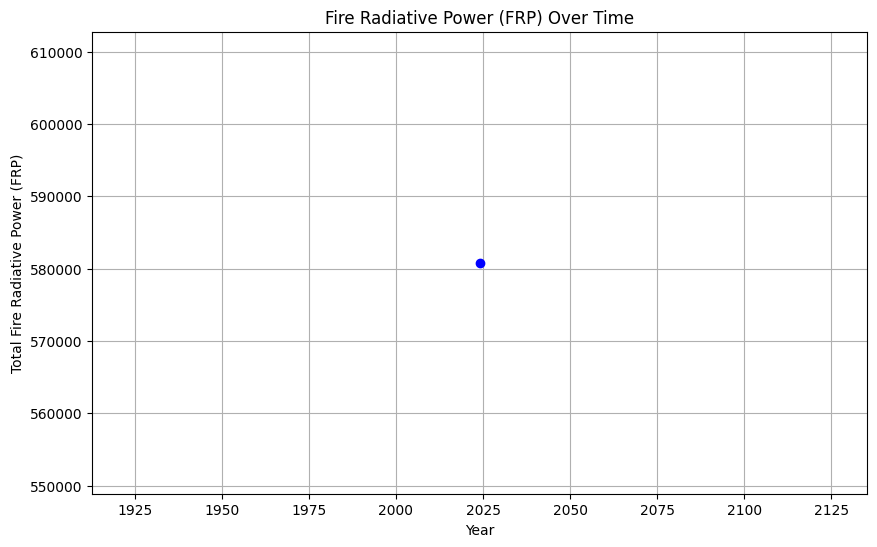

In [107]:
# Group by year and sum the FRP or area
fire_activity_by_year = land_cover_fire_join.groupby('year')['frp'].sum().reset_index()

# Plot fire radiative power (FRP) over time
plt.figure(figsize=(10, 6))
plt.plot(fire_activity_by_year['year'], fire_activity_by_year['frp'], marker='o', color='b')
plt.title('Fire Radiative Power (FRP) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fire Radiative Power (FRP)')
plt.grid(True)
plt.show()


### Aggregating Total Fire Area by Month.

In [111]:
# Group by year and month, and sum the fire area
monthly_fire_area = land_cover_fire_join.groupby(['year', 'month_name'])['area'].sum().reset_index()

# Sort by month
monthly_fire_area['month_number'] = pd.to_datetime(monthly_fire_area['month_name'], format='%B').dt.month
monthly_fire_area = monthly_fire_area.sort_values('area')

# Display the monthly fire area
monthly_fire_area


year month_name         area  month_number
3  2024       June     2.244568             6
6  2024    October    24.420819            10
4  2024      March   291.034986             3
1  2024   February   319.711989             2
2  2024    January  1067.836447             1
5  2024        May  1578.130765             5
0  2024      April  3373.180849             4

### Aggregating Total FRP by Month.

In [110]:
# Group by year and month, and sum the FRP
monthly_frp = land_cover_fire_join.groupby(['year', 'month_name'])['frp'].sum().reset_index()

# Sort by month
monthly_frp['month_number'] = pd.to_datetime(monthly_frp['month_name'], format='%B').dt.month
monthly_frp = monthly_frp.sort_values('frp')

# Display the monthly FRP
monthly_frp


year month_name        frp  month_number
3  2024       June     157.56             6
6  2024    October    1256.47            10
4  2024      March   27277.73             3
1  2024   February   30445.13             2
2  2024    January   69697.77             1
5  2024        May  165740.42             5
0  2024      April  286239.56             4

### Aggregating Fire Count by Month.

In [112]:
# Group by year and month, and count the fire events (rows)
monthly_fire_count = land_cover_fire_join.groupby(['year', 'month_name']).size().reset_index(name='fire_count')

# Sort by month
monthly_fire_count['month_number'] = pd.to_datetime(monthly_fire_count['month_name'], format='%B').dt.month
monthly_fire_count = monthly_fire_count.sort_values('fire_count')

# Display the monthly fire count
monthly_fire_count


year month_name  fire_count  month_number
3  2024       June          36             6
6  2024    October         319            10
1  2024   February        6296             2
4  2024      March        6730             3
2  2024    January       17530             1
5  2024        May       38070             5
0  2024      April       72851             4

### Line Plot of Fire Activity by Month.

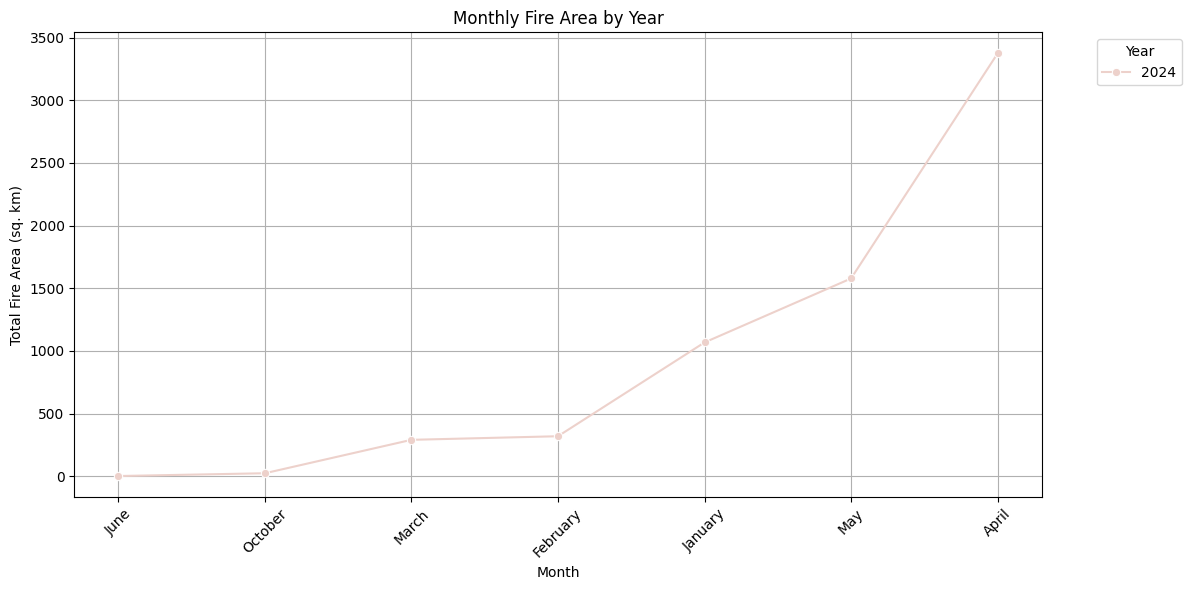

In [113]:
# Plot fire area by month (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_name', y='area', data=monthly_fire_area, hue='year', marker='o')
plt.title('Monthly Fire Area by Year')
plt.xlabel('Month')
plt.ylabel('Total Fire Area (sq. km)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


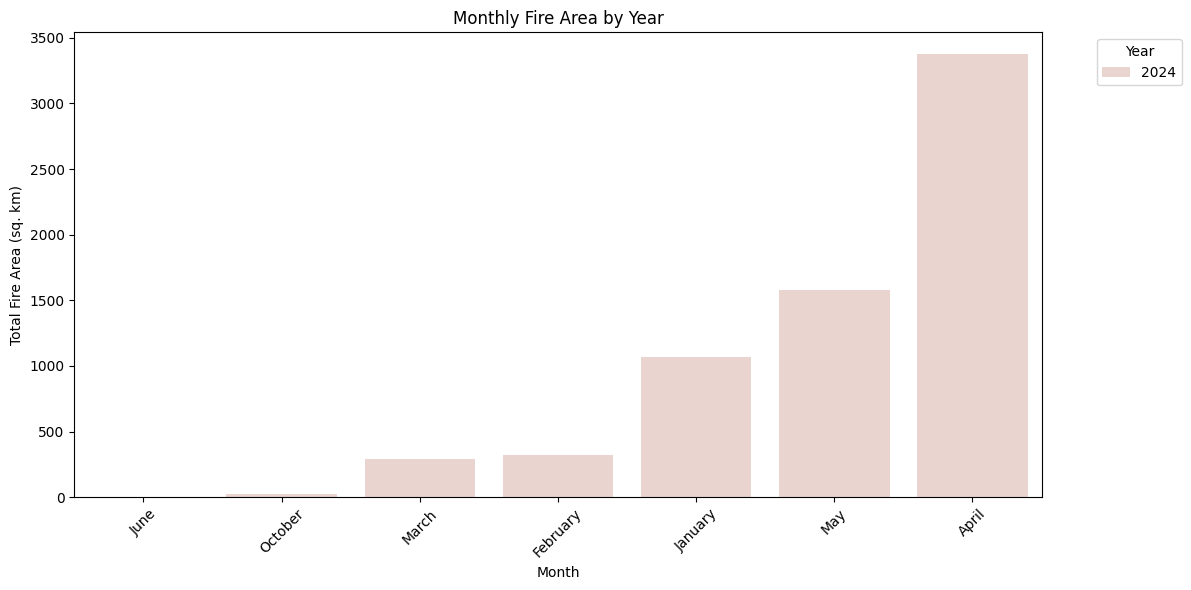

In [114]:
# Plot fire area by month (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='month_name', y='area', data=monthly_fire_area, hue='year')
plt.title('Monthly Fire Area by Year')
plt.xlabel('Month')
plt.ylabel('Total Fire Area (sq. km)')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Heatmap of Fire Activity by Month.

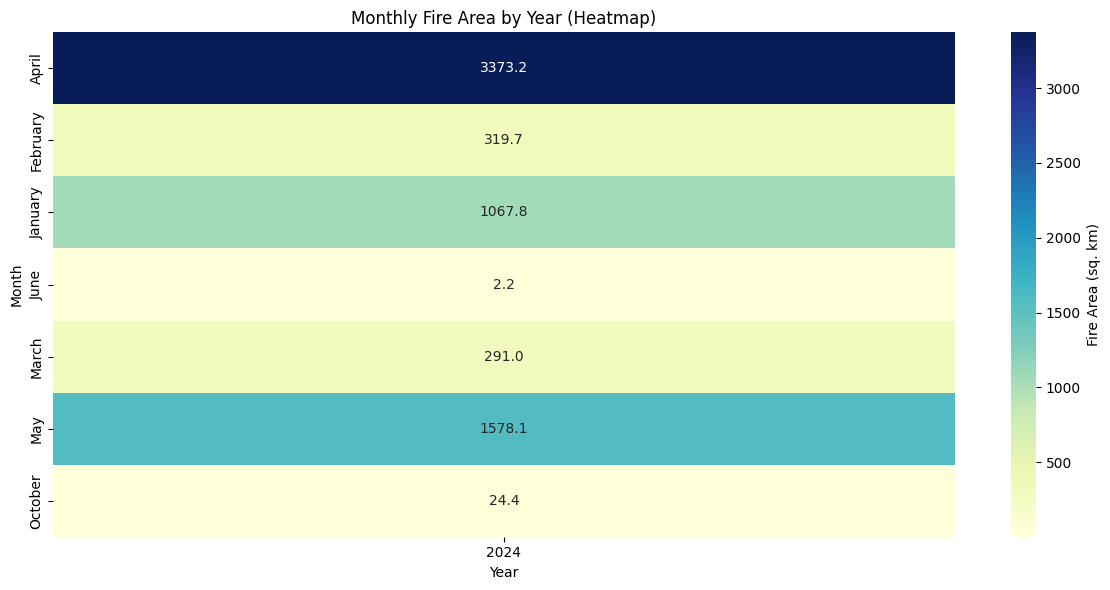

In [116]:
# Ensure that `monthly_fire_area` has 'month_name', 'year', and 'area' columns
# Pivot the DataFrame for heatmap
heatmap_data = monthly_fire_area.pivot(index='month_name', columns='year', values='area')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Fire Area (sq. km)'})
plt.title('Monthly Fire Area by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()
